In [ ]:
import pandas as pd
from pandas import DataFrame, read_csv
import seaborn as sns
import matplotlib.pyplot as plt

file = r'/Athletes.xlsx'
athletes_df = pd.read_excel(file).rename(columns={'name': 'athleteName'})
file = r'/Coaches.xlsx'
coaches_df = pd.read_excel(file).rename(columns={'name': 'coachesName'})
file = r'/EntriesGender.xlsx'
entriesGender_df = pd.read_excel(file)
file = r'/Medals.xlsx'
medal_df = pd.read_excel(file)
file = r'/Teams.xlsx'
teams_df = pd.read_excel(file)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
print("------------------------------------------------------------------\n")
new_athletes_df=athletes_df.rename(columns={'Name': 'athleteName'})
new_coaches_df=athletes_df.rename(columns={'Name': 'coachesName'})
athletes_coaches_df = new_athletes_df.merge(new_coaches_df, how='left', left_on=['NOC', 'Discipline'], right_on=['NOC', 'Discipline']).groupby('coachesName').count().sort_values(by='athleteName', ascending=False)
print(athletes_coaches_df.head())
print("\nLINDEN Desiree, LIGHTFOOT Kc, ZIEMEK Zachery, ZIEMEK Zachery and WINGER Kara are the top 5 coaches")
print("------------------------------------------------------------------\n")

------------------------------------------------------------------

                athleteName  NOC  Discipline
coachesName                                 
LINDEN Desiree          144  144         144
LIGHTFOOT Kc            144  144         144
ZIEMEK Zachery          144  144         144
WINGER Kara             144  144         144
WINKLER Rudy            144  144         144

LINDEN Desiree, LIGHTFOOT Kc, ZIEMEK Zachery, ZIEMEK Zachery and WINGER Kara are the top 5 coaches
------------------------------------------------------------------



In [ ]:
print("------------------------------------------------------------------\n")
entriesGender_df['female_proportions']=(entriesGender_df.Female/entriesGender_df.Total)*100
print(entriesGender_df.sort_values(by='female_proportions', ascending=False))
print("\n------------------------------------------------------------------\n")
print("\nArtistic Swimming, Rhythmic Gymnastics, Cycling BMX Freestyle, Diving and 3x3 Basketball are the top 5")
print("------------------------------------------------------------------\n")

------------------------------------------------------------------

               Discipline  Female  Male  Total  female_proportions
3       Artistic Swimming     105     0    105          100.000000
28    Rhythmic Gymnastics      96     0     96          100.000000
12  Cycling BMX Freestyle      10     9     19           52.631579
17                 Diving      72    71    143           50.349650
0          3x3 Basketball      32    32     64           50.000000
32               Shooting     178   178    356           50.000000
1                 Archery      64    64    128           50.000000
26      Marathon Swimming      25    25     50           50.000000
27      Modern Pentathlon      36    36     72           50.000000
31                Sailing     175   175    350           50.000000
33          Skateboarding      40    40     80           50.000000
21                   Golf      60    60    120           50.000000
34         Sport Climbing      20    20     40           50.0

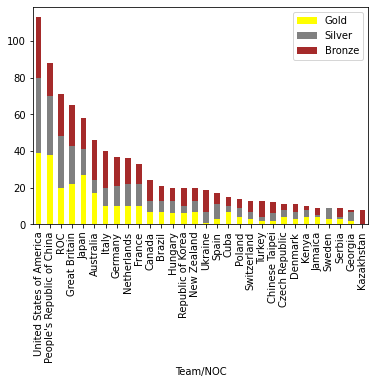

In [ ]:
new_medal_df=medal_df.sort_values(by='Total', ascending=False).head(30).filter(['Team/NOC', 'Gold', 'Silver', 'Bronze']).set_index('Team/NOC')
new_medal_df.plot(kind='bar', stacked=True, color=['yellow', 'grey', 'brown'])

In [ ]:
print("------------------------------------------------------------------\n")
new_teams_df=teams_df.drop_duplicates(subset = "NOC")
new_teams_df['name_difference']=new_teams_df.Name==new_teams_df.NOC
print(new_teams_df[(new_teams_df.name_difference==False)].shape)
print('\nThere are 13 countries that their team\'s name different from their NOC')
print("------------------------------------------------------------------\n")

------------------------------------------------------------------

(13, 5)

There are 13 countries that their team's name different from their NOC
------------------------------------------------------------------



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
